In [1]:
import glacierml as gl
import pandas as pd
import numpy as np
import tensorflow as tf
import glob
import os
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


2023-07-20 13:30:08.267676: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-20 13:30:08.311959: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-20 13:30:08.907954: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
parameterization = '4'
data = gl.parameterize_data(parameterization)
model_statistics = pd.read_pickle('zults/model_statistics_' + parameterization + '.pkl')

architecture_weights, residual_model = gl.compute_model_weights(
    model_statistics, parameterization, pth = '/data/fast1/glacierml/data'
)

architecture_weights
aw = architecture_weights

In [ ]:
aw

In [ ]:
plt.scatter(aw.index, aw.aw_1)

In [ ]:
# plt.scatter(
#     aw.index,
#     aw.aw_1,
#     label = 'Interpretation 1'
# )
# plt.scatter(
#     aw.index,
#     aw.aw_2,
#     label = 'Interpretation 2'
# )
# plt.scatter(
#     aw.index,
#     aw.aw_3,
#     label = 'Interpretation 3'
# )
# plt.ylabel('Architecture Weight')
# plt.xlabel('Architecture Index')
# plt.legend()


In [ ]:

# plt.plot(
#     aw.index, 
#     1 / (np.cumsum(1/ architecture_weights['architecture weight']))
# )
# plt.title('Cumulative Thickness Variance' +  
#           r' $\hat{\sigma}_{l}^{2} =\frac{{1}}{{\sum_{i}1 / \sigma^{2}_{il}}}$'
#          )
# plt.xlabel('Architecture Index (i)')
# plt.ylabel('Composite Variance $(\hat{\sigma}_{l}^{2})$')
# plt.grid(visible = None)

# Model Weighting

In [ ]:
parameterization = '4'
est = pd.read_pickle('model_weights/param' + parameterization + '_weighting_data.pkl')
model_list = []
res_list = []
pool_list = []
weight_list = []
for i in range(0,25,1):
    model_list.append(str(i))
    res_list.append('r_'+str(i))
    pool_list.append('pr_'+str(i))
    weight_list.append('w_'+str(i))
est[model_list] = np.round(est[model_list], 0)
est[res_list] = np.round(est[model_list], 0)
est[pool_list] = np.round(est[pool_list], 2)

In [ ]:

# df = pd.DataFrame()
# for i in tqdm(range(0,54901,161)):
# #     print(i)
# #     print(i + 161)
# #     print('')
    
#     dfg = est[model_list].iloc[i:i+161]
#     y = pd.DataFrame(dfg.var(axis = 0)).astype(float)
#     x = est[[
#          'CenLat',
#          'CenLon',
#          'Slope',
#          'Zmin',
#          'Zmed',
#          'Zmax',
#          'Area',
#          'Aspect',
#          'Lmax',
#          'Thickness',
#     ]].iloc[i:i+25]
    
#     dft = pd.concat([x.reset_index(drop=True),y.reset_index(drop=True)],axis=1)
#     df = pd.concat([df, dft])
# #     break
# for i in list(x):
#     fig, ax = plt.subplots(1,1,figsize = (10,10))
#     plt.scatter(
#         df[i],
#         df[0]
#     )
#     plt.title(i)

In [ ]:
# f = np.random.normal(1, 2, 7500)
# # f = np.random.normal(1, 2, 216501)

# plt.hist((f), 25)
# # plt.yscale('log')
# plt.plot(
#     [np.percentile(f,50),np.percentile(f,50)],
#     [0,950], 'k--'
# )
# plt.plot(
#     [np.percentile(f,25),np.percentile(f,25)],
#     [0,900], 'k--'
# )
# plt.plot(
#     [np.percentile(f,75),np.percentile(f,75)],
#     [0,900], 'k--'
# )
# plt.text(
    
    
#     (f).mean() - 0.5,
#     955, s = 'Median'
# )
# plt.text(
#     np.percentile(f,75) + .18 ,
#     900, s = 'Q3'
# )
# plt.text(
#     np.percentile(f, 25) - 0.76,
#     900, s = 'Q1'
# )


# np.percentile(f,75) - np.percentile(f, 25)
# plt.ylim([0,1150])
# # plt.xscale('log')

In [ ]:

# f = est[pool_list].to_numpy().flatten()
# plt.hist((f), 25)
# plt.yscale('log')
# plt.plot(
#     [f.mean(),f.mean()],
#     [0,1e7], 'k--'
# )
# plt.plot(
#     [np.percentile(f,25),np.percentile(f,25)],
#     [0,1e7], 'k--'
# )
# plt.plot(
#     [np.percentile(f,75),np.percentile(f,75)],
#     [0,1e7], 'k--'
# )
# # plt.text(
    
    
# #     (f).mean() - 0.5,
# #     1e7, s = 'Median'
# # )
# # plt.text(
# #     np.percentile(f,75) + .18 ,
# #     4000000, s = 'Q3'
# # )
# # plt.text(
# #     np.percentile(f, 25) - 0.76,
# #     4000000, s = 'Q1'
# # )

# # plt.ylim([0,1150])
# # plt.xscale('log')

In [ ]:
# f = est[pool_list][est[pool_list].values <2]

In [ ]:
# f

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # fake data
# x = f

# # setup the figure and axes
# fig = plt.figure(figsize = (12,12))
# bpAx = fig.add_axes([0.2, 0.7, 0.7, 0.2])   # left, bottom, width, height:
#                                             # (adjust as necessary)
# histAx = fig.add_axes([0.2, 0.2, 0.7, 0.5]) # left specs should match and
#                                             # bottom + height on this line should
#                                             # equal bottom on bpAx line
# # plot stuff
# bp = bpAx.boxplot(x, notch=True, vert=False)
# h = histAx.hist(x, bins=25)

# # confirm that the axes line up 
# xlims = np.array([bpAx.get_xlim(), histAx.get_xlim()])
# # for ax in [bpAx, histAx]:
# #     ax.set_xlim([xlims.min(), xlims.max()])

# bpAx.set_xticklabels([])  # clear out overlapping xlabels
# bpAx.set_yticks([])  # don't need that 1 tick mark
# # plt.yscale('log')
# plt.plot(
#     [np.percentile(f, 50),np.percentile(f,50)],
#     [0,120000], 'k--'
# )
# plt.plot(
#     [np.percentile(f,25),np.percentile(f,25)],
#     [0,120000], 'k--'
# )
# plt.plot(
#     [np.percentile(f,75),np.percentile(f,75)],
#     [0,120000], 'k--'
# )
# # plt.yscale('log')
# plt.show()

# np.percentile(f,75) - np.percentile(f,25)

In [ ]:
# plt.boxplot(est[pool_list].to_numpy().flatten())

# By Architecture

In [ ]:
weights = pd.DataFrame()
architecture_weights = pd.DataFrame()
for i in (est['layer architecture'].unique()):
    dft = est[est['layer architecture'] == str(i)]

#     simple method
    simple_var = np.var(dft[res_list].to_numpy().flatten())
    q75, q25 = np.nanpercentile(dft[res_list], [75,25])
    sigma_simple = ((q75 - q25) ) / 1.5 
    
    
    # interpretation 1: pooling just the model stuff
    bias_1 = np.mean(dft[pool_list].to_numpy()) * np.mean(dft[model_list].to_numpy())
    
    q75, q25 = np.nanpercentile(dft[pool_list], [75,25])
    sigma_1 = ((q75 - q25) * np.mean(dft[model_list].to_numpy())) / 1.5 
    
    
    # interpretation 2: pool model, but take the mean creatively
    bias_2 = np.mean(dft[pool_list].to_numpy() * dft[model_list].to_numpy())
    
    
    
    
    # interpretation 3: Take the mean of the pool and scale by model thickness
    bias_3 = np.mean(est[pool_list].to_numpy()) * np.mean(dft[model_list].to_numpy())
    q75, q25 = np.nanpercentile(est[pool_list], [75,25])
    sigma_3 = ((q75 - q25) * np.mean(dft[model_list].to_numpy())) / 1.5 
       
    var = dft[model_list].values.var()
    w = pd.Series(
        abs(bias_1) + sigma_1**2, 
        name = 'weight'
    )
    
    w = pd.Series(
        simple_var, 
        name = 'weight'
    )
    
    w = pd.Series(
        abs(bias_1) + sigma_1**2, 
        name = 'weight'
    )
#     print(var)
#     break
    architecture_weights = pd.concat([architecture_weights, w])
    architecture_weights = architecture_weights.reset_index()
    architecture_weights = architecture_weights.drop('index', axis = 1)
    
    architecture_weights.loc[architecture_weights.index[-1], 'layer architecture'] = i
    architecture_weights.loc[architecture_weights.index[-1], 'bias1'] = bias_1
    architecture_weights.loc[architecture_weights.index[-1], 'bias2'] = bias_2
    architecture_weights.loc[architecture_weights.index[-1], 'bias3'] = bias_3
    architecture_weights.loc[architecture_weights.index[-1], 'var_1'] = sigma_1**2
#     architecture_weights.loc[architecture_weights.index[-1], 'std'] = sigma
    architecture_weights.loc[architecture_weights.index[-1], 'var_2'] = sigma_3**2
    architecture_weights.loc[architecture_weights.index[-1], 'simple var'] = simple_var
    architecture_weights.loc[architecture_weights.index[-1], 'simple sig'] = sigma_simple

    
#     break
architecture_weights = architecture_weights.rename(columns = {0:'architecture weight'})
aw = architecture_weights
aw

In [ ]:
# plt.errorbar(mean, std, xerr = mean_ci_width, yerr = std_ci_width, linestyle='None', 
#              marker='.', markerfacecolor = 'b', linewidth = 1, capsize = 2, capthick = 1
#             )
# plt.xlabel('Mean Thickness')
# plt.ylabel('Bootstrap STD')
# # plt.yscale('log')
# # plt.xscale('log')

In [ ]:
model_list = []
for i in range(0,25,1):
    model_list.append(str(i))

In [ ]:
df = pd.read_hdf(
            'predicted_thicknesses/compiled_raw_' + '4' + '.h5',
            key = 'compiled_raw', mode = 'a'
        )

In [ ]:
grp_lst_args = list(df.groupby('RGIId').groups.items())

In [ ]:
grp_lst_args[0][1]

In [ ]:
t = df[model_list].loc[
    grp_lst_args[0][1]
].to_numpy()

In [ ]:
len(grp_lst_args)

In [ ]:
dft = df[model_list].to_numpy()

In [ ]:
np.shape(dft)

In [ ]:
# for i in np.shape(dft)[]
dft[0][:]

In [ ]:
def crunch_numbers_2(arg):
    this_rgi_id, obj = grp_lst_args
    return pd.DataFrame(
        [
            [
                this_rgi_id,
                df.loc[c[0]].ser_no,
                df.loc[c[1]].ser_no,
                vincenty(df.loc[c[0], x],df.loc[c[1], x])
            ]
                 for grp,lst in df.groupby('RGIId').groups.items()
                 for c in combinations(lst, 2)
        ],
               columns=['RGIId','machineA','machineB','distance'])

In [ ]:
df = pd.DataFrame()


In [ ]:
bar_H = np.zeros(shape = (1,6))


In [ ]:
np.shape(bar_H)

In [ ]:


grp_lst_args = list(df.groupby('co_nm').groups.items())

print(grp_lst_args)


In [ ]:
def calc_dist2(arg):
    grp, lst = arg
    return pd.DataFrame(
               [ [grp,
                  df.loc[[0]].ser_no,
                  df.loc[[1]].ser_no,
                  geodesic(df.loc[[0], ['lat','lon']], 
                           df.loc[[1], ['lat','lon']])
                 ]
#                  for c in combinations(lst, 2)
               ],
               columns=['co_nm','machineA','machineB','distance'])

In [ ]:
pool = mp.Pool(processes = (mp.cpu_count() - 1))
results = pool.map(calc_dist2, grp_lst_args)
pool.close()
pool.join()

results_df = pd.concat(results)

In [ ]:
results_df

In [ ]:
RGI = gl.load_RGI()
RGI

In [ ]:
for this_rgi_id, obj in tqdm(compiled_raw):
    obj = pd.merge(obj, aw, how = 'inner', on = 'layer architecture')
    break

In [ ]:
RGI

In [ ]:
df = pd.merge(df, aw, how = 'inner', on = 'layer architecture')

In [ ]:
dft = pd.DataFrame(compiled_raw.groups.keys())

In [ ]:
dft

In [ ]:
this_rgi_id = grp_lst_args[0]
obj = grp_lst_args[1]

In [ ]:
def crunch_numbers_2(arg):
    grp, lst = arg
    return pd.DataFrame(
               [ [grp,
                  df.loc[c[0]].ser_no,
                  df.loc[c[1]].ser_no,
                  vincenty(df.loc[c[0], ['lat','lon']], 
                           df.loc[c[1], ['lat','lon']])
                 ]
                 for c in combinations(lst, 2)
               ],
               columns=['co_nm','machineA','machineB','distance'])

In [ ]:
grp_lst_args

In [ ]:
compiled_raw.get_group(compiled_raw.groups.keys())

In [ ]:
import pandas as pd
from geopy.distance import geodesic
import multiprocessing as mp

In [ ]:
df = pd.DataFrame({'ser_no': [1, 2, 3, 4, 5, 6, 7, 8, 9, 0],
                'co_nm': ['aa', 'aa', 'aa', 'bb', 'bb', 'bb', 'bb', 'cc', 'cc', 'cc'],
                'lat': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                'lon': [21, 22, 23, 24, 25, 26, 27, 28, 29, 30]})

In [ ]:
df

In [ ]:
grp_lst_args = list(df.groupby('co_nm').groups.items())

print(grp_lst_args)

In [ ]:
def calc_dist2(grp_lst_args):
    grp, lst = arg
    return pd.DataFrame(
               [ [grp,
                  df.loc[c[0]].ser_no,
                  df.loc[c[1]].ser_no,
                  geodesic(df.loc[c[0], ['lat','lon']], 
                           df.loc[c[1], ['lat','lon']])
                 ]
                 for c in combinations(lst, 2)
               ],
               columns=['co_nm','machineA','machineB','distance'])

In [ ]:
pool = mp.Pool(processes = (mp.cpu_count() - 1))
results = pool.map(calc_dist2, grp_lst_args)
pool.close()
pool.join()

results_df = pd.concat(results)

In [ ]:
results_df

In [ ]:
calc_dist2('bb')

In [ ]:
RGI['RGIId']

In [ ]:
for RGIId in df['RGIId'].unique():
    dft = df[df['RGIId']  == RGIId]
    break
dft

In [ ]:
obj

In [ ]:
predictions = np.array(obj[model_list])

In [ ]:
predictions

In [ ]:
import scipy.stats as st
mean = []
mean_ci = []
mean_ci_width = []

var = []
var_ci = []
var_ci_width = []

std = []
std_ci = []
std_ci_width = []
for i in range(0,161,1):
#     print(pr[i][:])
#     break
    mean_i, var_i, std_i = st.bayes_mvs(np.array(predictions)[i][:], alpha=0.95)
        
    
    mean_i_width = mean_i[1][1] - mean_i[1][0]
    std_i_width = std_i[1][1] - std_i[1][0]
    var_i_width = var_i[1][1] - var_i[1][0]

    mean.append(mean_i[0])
    mean_ci.append(mean_i[1])
    mean_ci_width.append(mean_i_width)
    
    std.append(std_i[0])
    std_ci.append(std_i[1])
    std_ci_width.append(std_i_width)
    
    var.append(var_i[0])
    var_ci.append(var_i[1])
    var_ci_width.append(var_i_width)


In [ ]:
var_ci

In [ ]:
var_ci[::]

In [ ]:
weights = np.tile(np.array(obj['architecture weight']), (2,1)).T

In [ ]:
t = (sum(mean_ci/weights) / sum(1/weights))
u = np.sqrt(sum(var_ci/weights) / sum(1/weights))

In [ ]:
np.median(t) - u[0]

In [ ]:
t[0] - u[0]

In [ ]:
t[1] + u[1]

In [ ]:
u

In [ ]:
u[0]

In [ ]:
u[1]

In [ ]:
var_ci[0][0]

In [ ]:
x = np.array(mean)
y = (np.array(mean_ci_width))

In [ ]:
plt.scatter(x, y)
plt.xlabel('Estimated Thickness')
plt.ylabel('Estimate CI Width')
# plt.xscale('log')
# plt.yscale('log')

# plt.scatter(mean, var_ci_width)
# plt.xscale('log')
# plt.yscale('log')

In [ ]:
plt.hist(mean_ci_width, 20)

In [ ]:
# data.sort_values('total parameters')

In [4]:
rootdir = 'zults/'
predictions = pd.DataFrame()
statistics = pd.DataFrame()
file_reader = pd.read_pickle(rootdir + 'model_statistics_' + parameterization + '.pkl')
statistics = pd.concat([statistics, file_reader], ignore_index = True)

# statistics = statistics.drop('Unnamed: 0', axis = 1)
statistics['total parameters'] = statistics['total parameters'].astype(int)
statistics['trained parameters'] = statistics['trained parameters'].astype(int)
statistics['total inputs'] = statistics['total inputs'].astype(int)
statistics['test - train'] = (
    abs(statistics['test mae avg'] - statistics['train mae avg']))
statistics['paramater ratio'] = statistics['trained parameters'] / statistics['total inputs']
statistics

,layer architecture,total parameters,trained parameters,total inputs,test mae avg,train mae avg,test mae std dev,train mae std dev,architecture weight 1,architecture weight 2,test - train,paramater ratio
0,3-2,60,41,3069,17.888150,18.320922,4.794239,3.915898,145.110860,0.006891,0.432772,0.013359
1,4-2,72,53,3069,19.495260,19.487580,5.440397,4.502279,133.148514,0.007510,0.007680,0.017269
2,5-2,84,65,3069,16.948900,17.207373,4.296981,3.105293,153.152412,0.006529,0.258473,0.021180
3,6-2,96,77,3069,17.472450,17.441128,5.753468,3.278046,148.563301,0.006731,0.031322,0.025090
4,7-2,108,89,3069,18.054400,18.706029,4.467628,4.463059,143.774640,0.006955,0.651629,0.029000
...,...,...,...,...,...,...,...,...,...,...,...,...
156,16-15,450,431,3069,15.679167,16.010148,3.222594,0.768343,165.555028,0.006040,0.330981,0.140437
157,17-15,475,456,3069,15.743689,16.066999,3.108120,0.780996,164.876527,0.006065,0.323310,0.148583
158,18-15,500,481,3069,15.769674,16.090924,3.054389,0.852239,164.604852,0.006075,0.321250,0.156729
159,19-15,525,506,3069,15.665721,16.042760,3.150946,0.752430,165.697122,0.006035,0.377039,0.164875


In [5]:
data = pd.merge(aw, statistics, how = 'inner', on = 'layer architecture')
data

,aw_1,layer architecture,simple var,std_1,IQR_1,bias_1,std_2,IQR_2,bias_2,std_3,IQR_3,bias_3,IQR_4,aw_2,aw_3,aw_4,var_1,var_2,var_3,total parameters,trained parameters,total inputs,test mae avg,train mae avg,test mae std dev,train mae std dev,architecture weight 1,architecture weight 2,test - train,paramater ratio
0,732.291345,3-2,1113.313108,26.781961,0.644281,15.017932,21.803548,0.524518,16.190950,21.803548,0.524518,13.806269,21.498043,491.585660,489.200978,1113.313108,717.273413,475.394709,475.394709,60,41,3069,17.888150,18.320922,4.794239,3.915898,145.110860,0.006891,0.432772,0.013359
1,611.015499,4-2,1194.809873,24.442979,0.611215,13.556259,20.975890,0.524518,14.056095,20.975890,0.524518,13.282186,20.443029,454.044060,453.270151,1194.809873,597.459241,439.987965,439.987965,72,53,3069,19.495260,19.487580,5.440397,4.502279,133.148514,0.007510,0.007680,0.017269
2,612.544674,5-2,982.272746,24.445049,0.581080,14.984242,22.065585,0.524518,15.439692,22.065585,0.524518,13.972193,19.439691,502.329723,500.862224,982.272746,597.560432,486.890031,486.890031,84,65,3069,16.948900,17.207373,4.296981,3.105293,153.152412,0.006529,0.258473,0.021180
3,585.862171,6-2,996.936933,23.906937,0.574252,14.320543,21.836434,0.524518,14.345527,21.836434,0.524518,13.827092,19.000099,491.175366,490.656932,996.936933,571.541629,476.829839,476.829839,96,77,3069,17.472450,17.441128,5.753468,3.278046,148.563301,0.006731,0.031322,0.025090
4,619.720494,7-2,1130.109672,24.590442,0.596681,15.030646,21.616452,0.524518,15.738265,21.616452,0.524518,13.687797,20.015293,483.009277,480.958810,1130.109672,604.689848,467.271012,467.271012,108,89,3069,18.054400,18.706029,4.467628,4.463059,143.774640,0.006955,0.651629,0.029000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,536.998017,16-15,796.424106,22.831996,0.521651,15.697958,22.957469,0.524518,15.221257,22.957469,0.524518,14.536945,16.894839,542.266618,541.582306,796.424106,521.300059,527.045361,527.045361,450,431,3069,15.679167,16.010148,3.222594,0.768343,165.555028,0.006040,0.330981,0.140437
157,589.663770,17-15,815.504122,23.963573,0.549425,15.410941,22.877228,0.524518,15.127274,22.877228,0.524518,14.486136,17.547814,538.494828,537.853690,815.504122,574.252828,523.367554,523.367554,475,456,3069,15.743689,16.066999,3.108120,0.780996,164.876527,0.006065,0.323310,0.148583
158,533.967877,18-15,801.268352,22.789023,0.526793,14.628328,22.690620,0.524518,13.916129,22.690620,0.524518,14.367973,16.839402,528.780370,529.232215,801.268352,519.339548,514.864241,514.864241,500,481,3069,15.769674,16.090924,3.054389,0.852239,164.604852,0.006075,0.321250,0.156729
159,525.403031,19-15,787.769346,22.590863,0.519252,15.055938,22.819956,0.524518,14.314361,22.819956,0.524518,14.449870,16.621058,535.064738,535.200247,787.769346,510.347093,520.750377,520.750377,525,506,3069,15.665721,16.042760,3.150946,0.752430,165.697122,0.006035,0.377039,0.164875


In [8]:
data = data.sort_values('trained parameters')

0
20
40
60
80
100
120
140
160


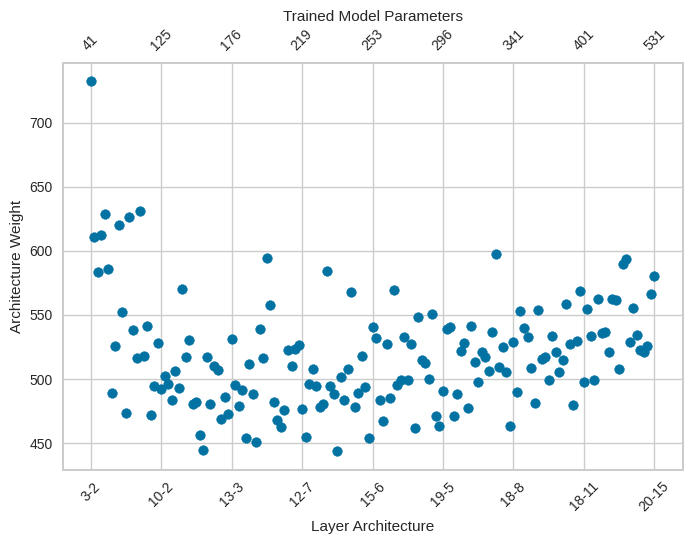

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# ax1 = fig.add_subplot(111)
ax.scatter(
    data['layer architecture'],
    (data['aw_1'])
)


ticks = []
for i in range(0,161,20):
    print(i)
    ticks.append(i)
ax.set_xticks(ticks, rotation = 45, labels = data['layer architecture'].iloc[ticks])

ax.grid(True)
ax.set_xlabel('Layer Architecture')
ax2 = ax.twiny()
ax2.set_xticks( ax.get_xticks() )
ax2.set_xbound(ax.get_xbound())
ax2.set_xticks(ax.get_xticks(), rotation = 45, 
                    labels = data['trained parameters'].iloc[ticks] 
)
ax2.grid(False)
ax2.set_xlabel('Trained Model Parameters')
ax.set_ylabel('Architecture Weight')
# title = ax1.set_title("Upper x-axis ticks are lower x-axis ticks doubled!")
# title.set_y(1.1)
fig.subplots_adjust(top=0.85)
# fig.suptitle('Architecture Weights as a Function of Model Complexity',y = 0.999)

In [ ]:
plt.scatter(
    aw.index,
    (aw['simple sig'])**2
)

In [ ]:
for i in range(1,4,1):
    plt.scatter(
        aw.index,
        aw['bias'+str(i)], 
        label = 'Interpretation '+str(i)
    )
plt.ylabel('Model Bias')
plt.xlabel('Architecture Index')
plt.legend()

In [ ]:
plt.scatter(
    aw.index,
    aw['var_1'],
    label = 'Model Pool Deviation IQR'
)
plt.scatter(
    aw.index,
    aw['var_2'],
    label = 'Total Pool Deviation IQR'
)
plt.legend()
plt.show()

In [ ]:
plt.scatter(
    aw.index,
    aw['var_1'] + aw['bias1'],
    alpha = 0.5,
    label = 'Weight 1'
)
plt.scatter(
    aw.index,
    aw['var_1'] + aw['bias2'],
    alpha = 0.5,
    label = 'Weight 2'
)
plt.scatter(
    aw.index,
    aw['var_1'] + aw['bias3'],
    alpha = 0.5,
    label = 'Weight 3'
)
plt.scatter(
    aw.index,
    aw['var_2'] + aw['bias1'],
    alpha = 0.5,
    label = 'Weight 4'
)
plt.scatter(
    aw.index,
    aw['var_2'] + aw['bias2'],
    alpha = 0.5,
    label = 'Weight 5'
)
plt.scatter(
    aw.index,
    aw['var_2'] + aw['bias3'],
    alpha = 0.5,
    label = 'Weight 6'
)
plt.legend()
plt.show()

In [ ]:

fig, ax = plt.subplots(2,1, figsize = (10,10))

plt.subplot(2,1,1)

plt.scatter(
    architecture_weights['layer architecture'],
    architecture_weights['architecture weight']
)

plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=True)
plt.grid(False)
plt.xlabel('Layer Architecture')
plt.xticks([architecture_weights['layer architecture'].iloc[0], 
            architecture_weights['layer architecture'].iloc[85],
            architecture_weights['layer architecture'].iloc[160]])
plt.ylabel('Architecture Weight')



plt.subplot(2,1,2)

sum_of_weights = sum(1/architecture_weights['architecture weight'])

plt.plot(
    np.sort(1/architecture_weights['architecture weight'][::-1] )/ sum_of_weights, 'o'
#     marker = '.',
#     linestyle = None
    
)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.ylabel('Fractional Weight')
# string = '$w_{i} = \frac{1}{N_{g}N_{x}} \sum_{j}^{N_g} \sum_{k}^{N_x} \left(R_{ijk} - M_{i}\right)^2$'
plt.suptitle('Simple Residual Variance Weights $ w_i = {}^{R}_{}\sigma^{2}_{i}$', y = 0.92)

In [ ]:

fig, ax = plt.subplots(2,1, figsize = (10,10))

plt.subplot(2,1,1)

plt.scatter(
    architecture_weights['layer architecture'],
    architecture_weights['architecture weight']
)

plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=True)
plt.grid(False)
plt.xlabel('Layer Architecture')
plt.xticks([architecture_weights['layer architecture'].iloc[0], 
            architecture_weights['layer architecture'].iloc[85],
            architecture_weights['layer architecture'].iloc[160]])
plt.ylabel('Architecture Weight')



plt.subplot(2,1,2)

sum_of_weights = sum(1/architecture_weights['architecture weight'])

plt.plot(
    np.sort(1/architecture_weights['architecture weight'][::-1]) / sum_of_weights, 'o'
#     marker = '.',
#     linestyle = None
    
)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.ylabel('Fractional Weight')

In [ ]:

fig, ax = plt.subplots(2,1, figsize = (10,10))

plt.subplot(2,1,1)

plt.scatter(
    architecture_weights['layer architecture'],
    architecture_weights['architecture weight']
)

plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=True)
plt.grid(False)
plt.xlabel('Layer Architecture')
plt.xticks([architecture_weights['layer architecture'].iloc[0], 
            architecture_weights['layer architecture'].iloc[85],
            architecture_weights['layer architecture'].iloc[160]])
plt.ylabel('Architecture Weight')



plt.subplot(2,1,2)

sum_of_weights = sum(1/architecture_weights['architecture weight'])

plt.plot(
    np.sort(1/architecture_weights['architecture weight'])[::-1] / sum_of_weights, 'o'
#     marker = '.',
#     linestyle = None
    
)
